Task 4.10 - Part 1

1. Importing libraries and files
2. Addressing Security Implications and PII Data
3. Regional Segmentation and Spending Analysis
4. Excluding Low-Activity Customers and Exporting the Data
5. and 6. Customer Profiling and Visualization for Marketing Strategies
7. Aggregating Usage Frequency and Expenditure by Customer Profile
8. and 9. Analyzing Customer Profiles Across Regions and Departments

1. Importing libraries and files 

In [4]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# importing the new file

# path to the folder 
path = r'/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A4_Python/02 Data'

# importing the 'merged' file, output of the 1st part of the task
merged = pd.read_pickle(os.path.join(path, 'Prepared data', 'merged_df_output_4_9.pkl'))

In [6]:
# checking the file 
merged.head(5)

,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,joining_date,quantity_of_dependants,marital_status,annual_income
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,0,2539329,1,1,2,8,NaN,14084,2,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,0,2539329,1,1,2,8,NaN,12427,3,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,0,2539329,1,1,2,8,NaN,26088,4,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,0,2539329,1,1,2,8,NaN,26405,5,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


2. Addressing Security Implications and PII Data

The data, intended for training purposes, features fabricated names and surnames, rendering it non-sensitive for PPI. However, if it were real data, it would be sensitive regarding PPI, particularly concerning name, last name, income, marital status, and other personal information, highlighting the potential risks involved. 

3. Regional Segmentation and Spending Analysis

In [9]:
# Creating a dictionary for grouping states into the regions

Northeast = {'state': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']}
South = {'state': ['Delaware', 'Maryland', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']}
Midwest = {'state': ['Ohio', 'Indiana', 'Illinois', 'Michigan', 'Wisconsin', 'Minnesota', 'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas']}
West = {'state': ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 'Nevada', 'Washington', 'Oregon', 'California', 'Alaska', 'Hawaii']}


In [10]:
# assign regions dynamically

merged.loc[merged['state'].isin(Northeast['state']), 'region'] = 'Northeast'
merged.loc[merged['state'].isin(South['state']), 'region'] = 'South'
merged.loc[merged['state'].isin(Midwest['state']), 'region'] = 'Midwest'
merged.loc[merged['state'].isin(West['state']), 'region'] = 'West'

In [11]:
# rechecking the data 
merged.head(5)

,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,joining_date,quantity_of_dependants,marital_status,annual_income,region
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,0,2539329,1,1,2,8,NaN,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,0,2539329,1,1,2,8,NaN,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,0,2539329,1,1,2,8,NaN,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,0,2539329,1,1,2,8,NaN,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


Determining a difference in spending habits between the different U.S. regions in 2 ways: 

In [13]:
# Based on the frequency flag 

crosstab_1 = pd.crosstab(merged['region'], merged['frequency_flag'])

In [14]:
# Based on the reordering 

crostab_2 = pd.crosstab(merged['region'], merged['reordered'])
print(crostab_2)

reordered        0        1
region                     
Midwest    3137801  4459524
Northeast  2340710  3382026
South      4169667  6008523
West       3393391  4899522


In [15]:
# counting the number of orders by the customer
order_counts = merged['user_id'].value_counts()

In [16]:
# viewing the result
print(order_counts)

user_id
201268    3704
129928    3637
164055    3061
186704    2936
176478    2921
          ... 
182688       3
200575       3
124615       2
203875       2
91567        1
Name: count, Length: 206209, dtype: int64


4. Excluding Low-Activity Customers and Exporting the Data

In [18]:
# creating an exclusion flag
merged['activity_level'] = merged['user_id'].apply(
    lambda x: 'low_activity_customer' if order_counts[x] <= 5 else 'high_activity_customer')

In [19]:
# filtering high-activity customers and saving the data as .csv file 

high_activity_customer = merged[merged['activity_level'] == 'high_activity_customer']

In [20]:
# exporting the newly created df as a .pickle file

# importing the 'merged' file, output of the 1st part of the task
high_activity_customer.to_pickle(os.path.join(path, 'Prepared data', 'high_activity_customer.pkl'))

print("File saved successfully!")

File saved successfully!


5. and 6. Customer Profiling and Visualization for Marketing Strategies

In [22]:
# Categorizing customers into age groups based on their age:
# - 'Young Adult' for ages 18 to 39
# - 'Middle-Aged Adults' for ages 40 to 59
# - 'Older Adults' for ages 60 to 79
# - 'Seniors' for ages 80 and above

high_activity_customer.loc[(high_activity_customer['age'] >= 18) & (high_activity_customer['age'] <= 39), 'age_group'] = 'Young Adult'
high_activity_customer.loc[(high_activity_customer['age'] >= 40) & (high_activity_customer['age'] <= 59), 'age_group'] = 'Middle-Aged Adults'
high_activity_customer.loc[(high_activity_customer['age'] >= 60) & (high_activity_customer['age'] <= 79), 'age_group'] = 'Older Adults'
high_activity_customer.loc[(high_activity_customer['age'] >= 80), 'age_group'] = 'Seniors'

/var/folders/tt/mzspvn2d7hb3qsps4c4lqh0c0000gn/T/ipykernel_4479/2732756725.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_customer.loc[(high_activity_customer['age'] >= 18) & (high_activity_customer['age'] <= 39), 'age_group'] = 'Young Adult'


In [23]:
# Counting the number of customers in each age group ('Young Adult', 'Middle-Aged Adults', 'Older Adults', 'Seniors')
# and printing the results to observe the distribution of customers across the defined age groups.

age_group_counts = high_activity_customer['age_group'].value_counts()
print(age_group_counts)

age_group
Young Adult           11161947
Middle-Aged Adults    10171573
Older Adults          10040775
Seniors                1024295
Name: count, dtype: int64


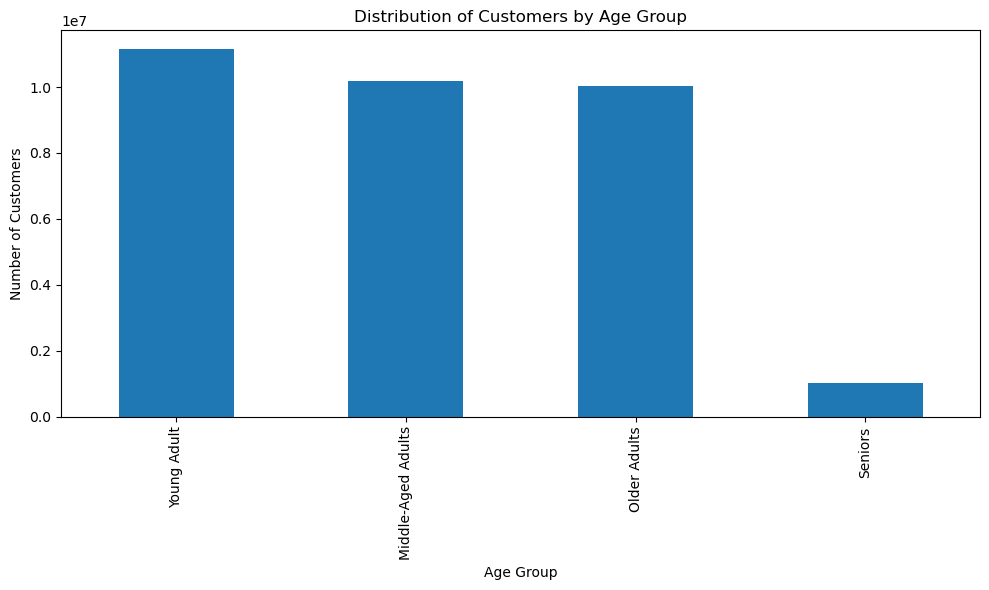

In [24]:
# Creating a bar plot to visualize the distribution of customers across the defined age groups
plotbar_1 = high_activity_customer['age_group'].value_counts().plot.bar(
    figsize=(10, 6), title='Distribution of Customers by Age Group'
)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')

# Adjusting layout and saving the plot to the specified directory
plt.tight_layout()  # Ensures the layout fits well
save_path = '/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A4_Python/Instacart Basket Analysis/04 Analysis/Visualizations/age_group_distribution.png'
plt.savefig(save_path, format='png', dpi=300)  # Saves the bar chart as a high-quality image

# Displaying the plot
plt.show()


In [25]:
# Categorizing customers into income groups based on their annual income:
# - 'Low-Income Households' for incomes less than or equal to $40,000
# - 'Lower-Middle-Income Households' for incomes between $40,001 and $60,000
# - 'Middle-Income Households' for incomes between $60,001 and $120,000
# - 'Upper-Middle-Income Households' for incomes between $120,001 and $200,000
# - 'High-Income Households' for incomes above $200,000

high_activity_customer.loc[(high_activity_customer['annual_income'] <= 40000), 'income_group'] = 'Low-Income Households'
high_activity_customer.loc[(high_activity_customer['annual_income'] > 40000) & (high_activity_customer['annual_income'] <= 60000), 'income_group'] = 'Lower-Middle-Income Households'
high_activity_customer.loc[(high_activity_customer['annual_income'] > 60000) & (high_activity_customer['annual_income'] <= 120000), 'income_group'] = 'Middle-Income Households'
high_activity_customer.loc[(high_activity_customer['annual_income'] > 120000) & (high_activity_customer['annual_income'] <= 200000), 'income_group'] = 'Upper-Middle-Income Households'
high_activity_customer.loc[(high_activity_customer['annual_income'] > 200000), 'income_group'] = 'High-Income Households'


/var/folders/tt/mzspvn2d7hb3qsps4c4lqh0c0000gn/T/ipykernel_4479/1087131891.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_customer.loc[(high_activity_customer['annual_income'] <= 40000), 'income_group'] = 'Low-Income Households'


In [26]:
# Counting the number of customers in each income group ('Low-Income Households', 
# 'Lower-Middle-Income Households', 'Middle-Income Households', 'Upper-Middle-Income Households', 
# 'High-Income Households') and printing the results to observe the distribution.

income_group_counts = high_activity_customer['income_group'].value_counts()
print(income_group_counts)

income_group
Middle-Income Households          16671057
Upper-Middle-Income Households     9311568
Lower-Middle-Income Households     4431658
Low-Income Households              1725868
High-Income Households              258439
Name: count, dtype: int64


In [27]:
# Preparing data for a pie chart to visualize the distribution of income groups:
# - 'labels' contains the names of the income groups.
# - 'sizes' contains the corresponding values (counts or percentages) for each group.
# - 'colors' specifies the colors for each slice of the pie chart for better visual differentiation.

labels = ['Middle-Income Households', 'Upper-Middle-Income Households', 'Lower-Middle-Income Household', 'Low-Income Households', 'High-Income Households']
sizes = [16671057, 9311568, 4431658, 1725868, 258439]  # Percentages or values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumpurple']

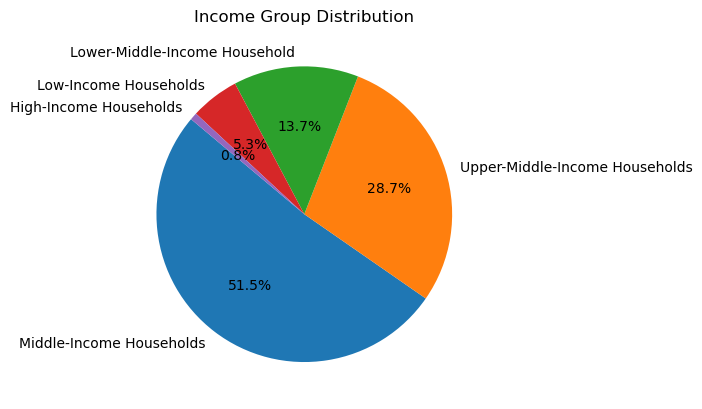

In [28]:
# Creating a pie chart to represent the distribution of income groups
piechart = plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140
)

# Adding a title for the chart
plt.title('Income Group Distribution')

# Adjusting layout and saving the chart to the specified directory
save_path = '/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A4_Python/Instacart Basket Analysis/04 Analysis/Visualizations/income_group_distribution_piechart.png'
plt.savefig(save_path, format='png', dpi=300)  # Saves the pie chart as a high-quality image

# Displaying the chart
plt.show()


In [29]:
# Categorizing customers into household structure groups based on the number of dependents:
# - 'Single' for households with 0 dependents.
# - 'Married/Common household' for households with 1 dependent.
# - 'Household with Kids' for households with 2 or more dependents.


high_activity_customer.loc[(high_activity_customer['quantity_of_dependants'] == 0), 'Household_Structure'] = 'Single'
high_activity_customer.loc[(high_activity_customer['quantity_of_dependants'] == 1), 'Household_Structure'] = 'Married/Common household'
high_activity_customer.loc[(high_activity_customer['quantity_of_dependants'] == 2) & (high_activity_customer['quantity_of_dependants'] > 2), 'Household_Structure'] = 'Household with Kids'


/var/folders/tt/mzspvn2d7hb3qsps4c4lqh0c0000gn/T/ipykernel_4479/1042819050.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_customer.loc[(high_activity_customer['quantity_of_dependants'] == 0), 'Household_Structure'] = 'Single'


In [30]:
# Counting the number of customers in each household structure group 
# ('Single', 'Married/Common household', 'Household with Kids') and printing the results
# to analyze the distribution of household types among high-activity customers.

Households = high_activity_customer['Household_Structure'].value_counts()
print(Households)

Household_Structure
Single                      8095929
Married/Common household    8079591
Name: count, dtype: int64


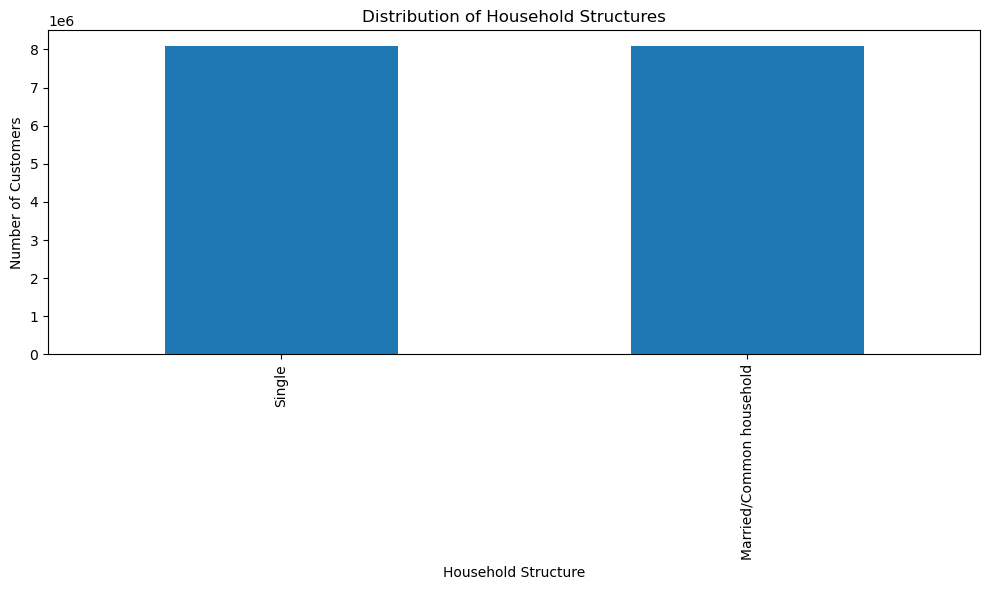

In [31]:
# Creating a bar plot to visualize the distribution of household structures
# ('Single', 'Married/Common household', 'Household with Kids') among high-activity customers

plotbar_2 = high_activity_customer['Household_Structure'].value_counts().plot.bar(
    figsize=(10, 6), title='Distribution of Household Structures'
)
plt.xlabel('Household Structure')
plt.ylabel('Number of Customers')

# Adjusting layout and saving the plot to the specified directory
plt.tight_layout()  # Ensures the layout fits well
save_path = '/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A4_Python/Instacart Basket Analysis/04 Analysis/Visualizations/household_structure_distribution.png'
plt.savefig(save_path, format='png', dpi=300)  # Saves the plot as a high-quality image

# Displaying the plot
plt.show()


Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

7. Aggregating Usage Frequency and Expenditure by Customer Profile

In [34]:
# viewing the actual columns for the df

high_activity_customer.columns

Index(['Unnamed: 0_x', 'order_id', 'user_id', 'order_number',
       'order_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'Unnamed: 0_y', 'product_name', 'aisle_id', 'department_id', 'prices',
       'max-order', 'max_order', 'loyalty_flag', 'avg_spending',
       'spending_flag', 'order_frequency', 'frequency_flag', 'first_name',
       'last_name', 'gender', 'state', 'age', 'joining_date',
       'quantity_of_dependants', 'marital_status', 'annual_income', 'region',
       'activity_level', 'age_group', 'income_group', 'Household_Structure'],
      dtype='object')

In [35]:
# creating a new column to define a total spendings
high_activity_customer['total_spending'] = high_activity_customer['prices'] * high_activity_customer['add_to_cart_order']

/var/folders/tt/mzspvn2d7hb3qsps4c4lqh0c0000gn/T/ipykernel_4479/1366947554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_customer['total_spending'] = high_activity_customer['prices'] * high_activity_customer['add_to_cart_order']


In [36]:
# Group by 'Household_Structure' and calculate an aggregated value for total spending 
aggregated_purchases = high_activity_customer.groupby('Household_Structure')['total_spending'].agg(['min', 'max', 'mean'])

# Display the result
print(aggregated_purchases)

                          min        max       mean
Household_Structure                                
Married/Common household  1.0  2499975.0  92.956249
Single                    1.0  3699963.0  95.130813


In [37]:
# Group by 'Household_Structure' and calculate aggregated values for 'prices'
aggregated_prices = high_activity_customer.groupby('Household_Structure')['prices'].agg(['min', 'max', 'mean'])

# Display the result
print(aggregated_prices)


                          min      max       mean
Household_Structure                              
Married/Common household  1.0  99999.0  11.630133
Single                    1.0  99999.0  12.117781


In [38]:
# Group by 'Household_Structure' and calculate aggregated values for 'purchases days since prior order 
aggregated_days = high_activity_customer.groupby('Household_Structure')['days_since_prior_order'].agg(['min', 'max', 'mean'])

# Display the result
print(aggregated_days)


                          min   max       mean
Household_Structure                           
Married/Common household  0.0  30.0  11.098646
Single                    0.0  30.0  11.079257


In [39]:
# Group by 'Household_Structure' and calculate an aggregated value for total spending 
aggregated_purchases_based_on_income = high_activity_customer.groupby('income_group')['total_spending'].agg(['min', 'max', 'mean'])

# Display the result
print(aggregated_purchases_based_on_income)

                                min        max         mean
income_group                                               
High-Income Households          1.0  3699963.0  1978.253106
Low-Income Households           1.0     2244.0    48.061655
Lower-Middle-Income Households  1.0   268200.0    57.999517
Middle-Income Households        1.0  2499975.0    75.337931
Upper-Middle-Income Households  1.0  4699953.0   106.344722


In [40]:
# Group by 'Household_Structure' and calculate aggregated values for 'prices'
aggregated_prices_based_on_income = high_activity_customer.groupby('income_group')['prices'].agg(['min', 'max', 'mean'])

# Display the result
print(aggregated_prices_based_on_income)


                                min      max        mean
income_group                                            
High-Income Households          1.0  99999.0  264.326675
Low-Income Households           1.0     25.0    6.496447
Lower-Middle-Income Households  1.0  14900.0    7.307972
Middle-Income Households        1.0  99999.0    9.079978
Upper-Middle-Income Households  1.0  99999.0   13.401381


In [41]:
# Group by 'Household_Structure' and calculate aggregated values for 'purchases days since prior order 
aggregated_days_based_on_income = high_activity_customer.groupby('income_group')['days_since_prior_order'].agg(['min', 'max', 'mean'])

# Display the result
print(aggregated_days_based_on_income)

                                min   max       mean
income_group                                        
High-Income Households          0.0  30.0  10.199525
Low-Income Households           0.0  30.0  11.680829
Lower-Middle-Income Households  0.0  30.0  11.323474
Middle-Income Households        0.0  30.0  11.027565
Upper-Middle-Income Households  0.0  30.0  11.052053


8. and 9. Analyzing Customer Profiles Across Regions and Departments

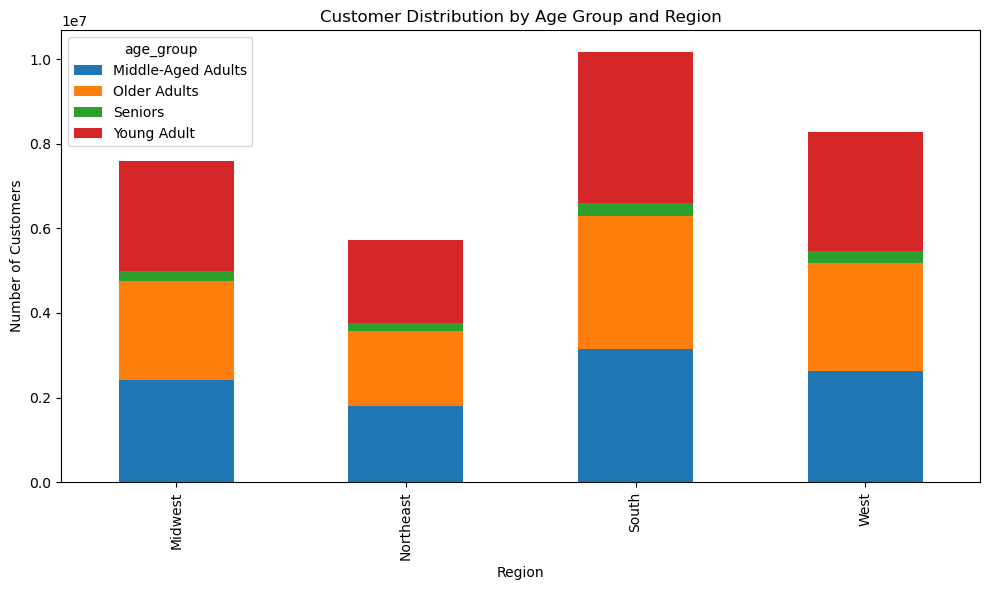

In [43]:
# Grouping customers by region and age group and counting the number of customers
age_group_region_counts = high_activity_customer.groupby(['region', 'age_group']).size()

# Resetting the index to prepare for plotting
age_group_region_counts = age_group_region_counts.reset_index(name='count')

# Pivoting the data to make it suitable for a bar plot
pivot_data = age_group_region_counts.pivot(index='region', columns='age_group', values='count')

# Plotting the data as a bar chart
plotbar_3 = pivot_data.plot(kind='bar', figsize=(10, 6), stacked=True, title='Customer Distribution by Age Group and Region')
plotbar_3.set_xlabel('Region')
plotbar_3.set_ylabel('Number of Customers')

# Adjusting layout and saving the plot to the specified directory
plt.tight_layout()  # Ensures the layout fits well
save_path = '/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A4_Python/Instacart Basket Analysis/04 Analysis/Visualizations/customer_distribution_by_age_group_and_region.png'
plt.savefig(save_path, format='png', dpi=300)  # Saves the plot as a high-quality image

# Display the plot
plt.show()


In [44]:
# Grouping customers by region and income group, then counting the number of customers in each group
income_group_region_counts = high_activity_customer.groupby(['region', 'income_group']).size()

# Printing the distribution of customers by income group within each region
print(income_group_region_counts)


region     income_group                  
Midwest    High-Income Households              65293
           Low-Income Households              400806
           Lower-Middle-Income Households    1025028
           Middle-Income Households          3891045
           Upper-Middle-Income Households    2213841
Northeast  High-Income Households              41127
           Low-Income Households              303109
           Lower-Middle-Income Households     778350
           Middle-Income Households          2938444
           Upper-Middle-Income Households    1660574
South      High-Income Households              79745
           Low-Income Households              556096
           Lower-Middle-Income Households    1416338
           Middle-Income Households          5239040
           Upper-Middle-Income Households    2884819
West       High-Income Households              67173
           Low-Income Households              432059
           Lower-Middle-Income Households    1133111
    

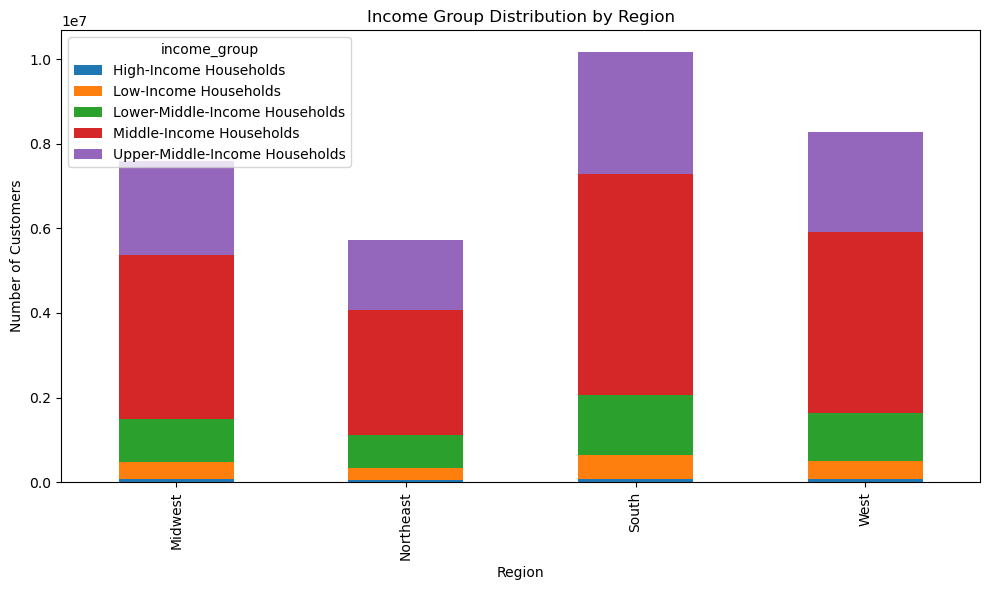

In [45]:
# Grouping customers by region and income group, then counting the number of customers in each group
income_group_region_counts = high_activity_customer.groupby(['region', 'income_group']).size()

# Resetting the index to prepare for plotting
income_group_region_counts = income_group_region_counts.reset_index(name='count')

# Pivoting the data to make it suitable for a bar plot
pivot_data = income_group_region_counts.pivot(index='region', columns='income_group', values='count')

# Plotting the data as a bar chart
plotbar_income = pivot_data.plot(kind='bar', figsize=(10, 6), stacked=True, title='Income Group Distribution by Region')
plotbar_income.set_xlabel('Region')
plotbar_income.set_ylabel('Number of Customers')

# Adjusting layout and saving the plot to the specified directory
plt.tight_layout()  # Ensures the layout fits well
save_path = '/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A4_Python/Instacart Basket Analysis/04 Analysis/Visualizations/income_group_distribution_by_region.png'
plt.savefig(save_path, format='png', dpi=300)  # Saves the plot as a high-quality image

# Display the plot
plt.show()


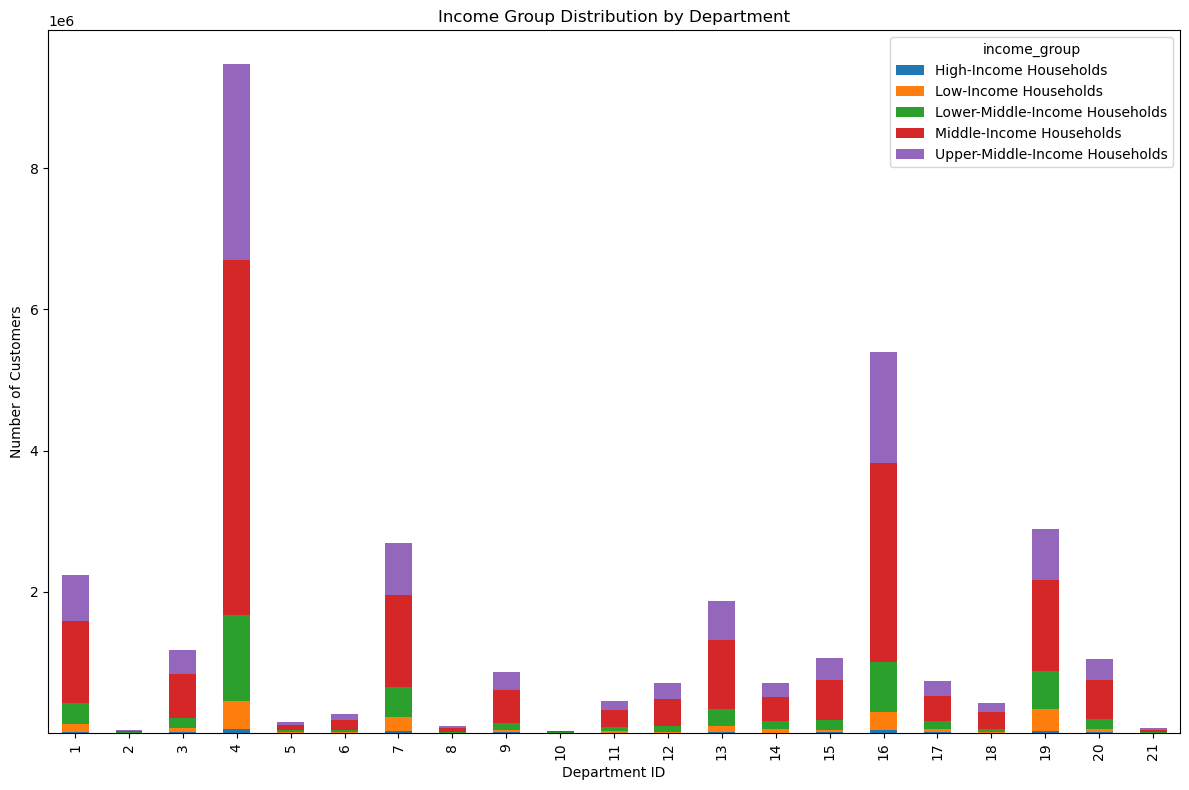

In [46]:
# Grouping customers by department_id and income group, then counting the number of customers in each group
income_group_department_counts = high_activity_customer.groupby(['department_id', 'income_group']).size()

# Resetting the index to prepare for plotting
income_group_department_counts = income_group_department_counts.reset_index(name='count')

# Pivoting the data to make it suitable for a bar plot
pivot_data_dept = income_group_department_counts.pivot(index='department_id', columns='income_group', values='count')

# Plotting the data as a bar chart
plotbar_income_dept = pivot_data_dept.plot(kind='bar', figsize=(12, 8), stacked=True, title='Income Group Distribution by Department')
plotbar_income_dept.set_xlabel('Department ID')
plotbar_income_dept.set_ylabel('Number of Customers')

# Adjusting layout and saving the plot to the specified directory
plt.tight_layout()  # Ensures the layout fits well
save_path = '/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A4_Python/Instacart Basket Analysis/04 Analysis/Visualizations/income_group_distribution_by_department.png'
plt.savefig(save_path, format='png', dpi=300)  # Saves the plot as a high-quality image

# Display the plot
plt.show()


In [47]:
# importing produced charts

In [48]:
# bar chart for distribution of orders among the customers based on loyalty flag
plt.savefig('/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A4_Python/Instacart Basket Analysis/04 Analysis/Visualizations/hist_order_hour_of_day.png')

<Figure size 640x480 with 0 Axes>